## Table of Contents

$\qquad \bullet$ [Data ETL](#load_data)<br>

### Data ETL

In [11]:
# imports

import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Get dataset, originally from: https://archive-beta.ics.uci.edu/ml/datasets/diabetes+130+us+hospitals+for+years+1999+2008
raw_data_mappings = "https://raw.githubusercontent.com/F4LLC0N3R/ML-Group-2---Diabetes/main/IDs_mapping.csv"
raw_data_diabetes = "https://raw.githubusercontent.com/F4LLC0N3R/ML-Group-2---Diabetes/main/diabetic_data.csv"

df_mappings = pd.read_csv(raw_data_mappings)
df_diabetes = pd.read_csv(raw_data_diabetes)


In [3]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

C:\Users\dnils\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='readmitted', ylabel='count'>

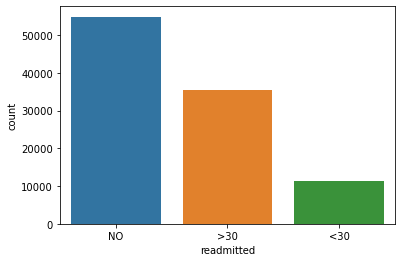

In [22]:
sns.countplot(df_diabetes['readmitted'])

In [7]:
# count NA values, which are represented with '?'
df_diabetes.isin(['?']).sum(axis=0)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# show percentage of NA values
df_diabetes.isin(['?']).sum(axis=0)/len(df_diabetes)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

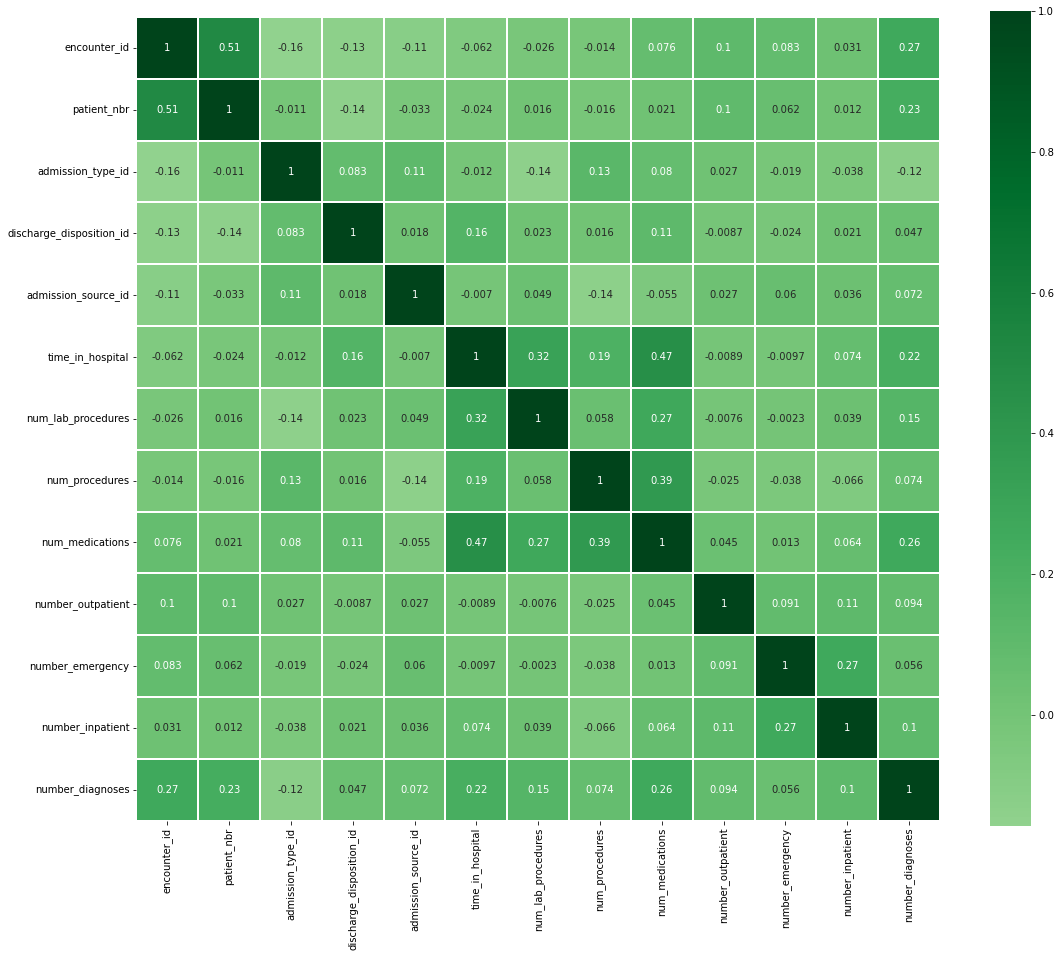

In [18]:
#present a heatmap of the dataframe based on the correlation between the variables 

correlation_variables = df_diabetes.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_variables, annot=True, vmax=1, center=0,
            square=True, linewidths=1, cmap='Greens');


#df_diabetes.corr()["readmitted"].sort_values(ascending=False)

In [ ]:
# printing the coefficients and the p-values of the independent variables after running logistic regression

# import statsmodels.api as sm
# logit_model = sm.Logit(y_train, X_train)
# results = logit_model.fit(method='bfgs')
# print(results.summary())